In [2]:
using Pkg
Pkg.activate("..")
using Clapeyron, PyCall
import PyPlot; const plt=PyPlot
ternary = pyimport("ternary")
using Clapeyron
using Plots
using CSV
using DataFrames
using LaTeXStrings

  Activating project at `c:\Users\fjm21\OneDrive - Imperial College London\Julia Scripts`


In [ ]:
#model = PCSAFT(["cyclohexane","methanol","propane"])

PCSAFT{BasicIdeal, Float64} with 3 components:
 "cyclohexane"
 "methanol"
 "propane"
Contains parameters: Mw, segment, sigma, epsilon, epsilon_assoc, bondvol

In [2]:
model = SAFTgammaMie([("MEA",["NH2"=>1, "CH2"=>1, "CH2OH"=>1]),("Water",["H2O"=>1]),("Carbon Dioxide",["CO2"=>1])];

        userlocations = (Mw = [16.02285, 14.02658, 31.03392, 18.01528, 44.01],

        epsilon = [284.78 348.39 528.21 339.89 134.58;
                   348.39 473.39 423.17 423.63 276.45;
                   528.21 423.17 407.22 358.02 312.3;
                   339.89 423.63 358.02 266.68 226.38;
                   134.58 276.45 312.3 226.38 207.89],
        sigma = [3.2477, 4.8801, 3.4054, 3.0063, 3.05],
        lambda_a = [6, 6, 6, 6, 5.055],
        lambda_r = [10.354 14.063 52.305 13.085 50.06;
                    14.063 19.871 21.230 100.00 22.873;
                    52.305 21.230 22.699 19.619 24.474;
                    13.085 100.00 19.619 17.020 21.116;
                    50.06  22.873 24.474 21.116 26.408],
        vst = [1, 1, 2, 1, 2],
        S = [0.79675, 0.22932, 0.58538, 1, 0.84680],
        n_H=[2, 0, 1, 2, 0],
        n_e=[1, 0, 2, 2, 0],
        n_a1=[0, 0, 0, 0, 1],
        #n_a1e=[1, 0, 0, 1, 0],
        n_a2=[0, 0, 0, 0, 1],
        #n_a2e=[1, 0, 0, 0, 0],
        epsilon_assoc = Dict([(("NH2","H"),("NH2","e")) => 1070.80,
                              (("NH2","H"),("CH2OH","e")) => 629.88,
                              (("NH2","H"),("H2O","e")) => 1364.40,
                              (("CH2OH","H"),("NH2","e")) => 2403.78,
                              (("CH2OH","H"),("CH2OH","e")) => 2097.90,
                              (("CH2OH","H"),("H2O","e")) => 600.00,
                              (("H2O","H"),("NH2","e")) => 1877.50,
                              (("H2O","H"),("CH2OH","e")) => 2000.6,
                              (("H2O","H"),("H2O","e")) => 1985.40,
                              (("CO2","a1"),("NH2","e")) => 3313,
                              (("CO2","a1"),("H2O","e")) => 1398.1,
                              (("CO2","a2"),("NH2","e")) => 4943.6]),
                              #(("CO2","a1"),("NH2","a1e")) => 3313,
                
                              #(("CO2","a1"),("H2O","a1e")) => 1398.1,
                 
                              #(("CO2","a2"),("NH2","a2e")) => 4943.6]),

        bondvol = Dict([(("NH2","H"),("NH2","e")) => 95.225e-30,
                              (("NH2","H"),("CH2OH","e")) => 346.08e-30,
                              (("NH2","H"),("H2O","e")) => 22.450e-30,
                              (("CH2OH","H"),("NH2","e")) => 26.192e-30,
                              (("CH2OH","H"),("CH2OH","e")) => 62.309e-30,
                              (("CH2OH","H"),("H2O","e")) => 490.19e-30,
                              (("H2O","H"),("NH2","e")) => 459.18e-30,
                              (("H2O","H"),("CH2OH","e")) => 130.02e-30,
                              (("H2O","H"),("H2O","e")) => 101.69e-30,
                              (("CO2","a1"),("NH2","e")) => 3280.3e-30,
                              (("CO2","a1"),("H2O","e")) => 91.419e-30,
                              (("CO2","a2"),("NH2","e")) => 142.64e-30])));
                
                              #(("CO2","a1"),("NH2","a1e")) => 3280.3e-30,
                
                              #(("CO2","a1"),("H2O","a1e")) => 91.419e-30,
                 
                              #(("CO2","a2"),("NH2","a2e")) => 142.64e-30])));

In [3]:
T = 343
p = 0.1e5
(x3,n3,G3) = tp_flash(model,p,T,[0.33,0.33,0.34],DETPFlash(numphases=3));

In [4]:
(x3)

3×3 Matrix{Float64}:
 0.465006    0.0657509  0.469243
 0.00121184  0.973542   0.025246
 0.00121184  0.973542   0.025246

In [5]:
x3[1,1]/x3[2,1]

383.71968092269367

In [9]:
K0 = [x3[1,1]/x3[2,1],x3[1,2]/x3[2,2],x3[1,3]/x3[2,3]]
z0 = (x3[1,:]+x3[2,:])/2
dz = z0[2]/200
x_LLE = zeros(200,6);

In [7]:
z0

3-element Vector{Float64}:
 0.23310886374445736
 0.5196465244925031
 0.2472446117630394

In [10]:
for i in 1:200
    z0[2] = z0[2] - dz
    (x,n,G) = tp_flash(model,p,T,z0,MichelsenTPFlash(K0=K0,equilibrium=:lle))
    x_LLE[i,1:3] = x[1,:] # x_LLE is a 200 x 6 matrix
    x_LLE[i,4:6] = x[2,:]
    K0 = [x[1,1]/x[2,1],x[1,2]/x[2,2],x[1,3]/x[2,3]]
    z0[[1,3]] = (x[1,[1,3]]+x[2,[1,3]])/2
    println(z0)
end

[0.1640067665465704, 0.5170482918700406, 0.4311377134274479]
[0.26157214325769607, 0.5144500592475781, 0.22461263250874777]
[0.3803005950012281, 0.5118518266251156, 0.17168695063531914]
[0.3577073965257303, 0.5092535940026531, 0.16207261458086036]
[0.3493790765625765, 0.5066553613801906, 0.15749988038015864]
[0.3460762159427768, 0.5040571287577281, 0.1555818005252917]
[0.3450968263359573, 0.5014588961352656, 0.15505526213324033]
[0.3453135045824058, 0.4988606635128031, 0.15526440534298813]
[0.3461614261697301, 0.4962624308903406, 0.1558675849253101]
[0.3473430070787956, 0.4936641982678781, 0.15668419337942474]
[0.3486996273679277, 0.4910659656454156, 0.15761778795347592]
[0.35014657967665386, 0.4884677330229531, 0.15861664202603326]
[0.35163867478191846, 0.4858695004004906, 0.1596529964427082]
[0.35315185485839323, 0.4832712677780281, 0.16071198165576012]
[0.3546733409795709, 0.4806730351555656, 0.16178566128803995]
[0.35619635794665133, 0.4780748025331031, 0.16286982232054853]
[0.3577

In [11]:
N = 1000
K0 = [x3[1,1]/x3[3,1],x3[1,2]/x3[3,2],x3[1,3]/x3[3,3]]
z0 = (x3[1,:]+x3[3,:])/2
dz = z0[1]/N
x_VLE1 = zeros(N,6)

for i in 1:N
    z0[1] = z0[1] - dz
    (x,n,G) = tp_flash(model,p,T,z0,RRTPFlash(K0=K0,equilibrium=:vle))
    idx_min = argmin(x[:,2])
    idx_max = argmax(x[:,2])
    x_VLE1[i,1:3] = x[idx_min,:]
    x_VLE1[i,4:6] = x[idx_max,:]
    K0 = x_VLE1[i,1:3]./x_VLE1[i,4:6]
    z0[2:3] = (x[1,2:3]+x[2,2:3])/2
    println(z0)
end

[0.23287575542305422, 0.519640305885292, 0.24736458950679965]
[0.23264264655876687, 0.5196308885319217, 0.2475461398607157]
[0.23240953769447953, 0.519619832194012, 0.24775928701380925]
[0.23217642883019218, 0.5196079350523855, 0.24798864341449064]
[0.23194331996590484, 0.5195956068807538, 0.24822630933132409]
[0.2317102111016175, 0.5195830579405852, 0.24846823128533052]
[0.23147710223733015, 0.519570396039846, 0.24871233092459175]
[0.2312439933730428, 0.5195576764075632, 0.24895754352858523]
[0.23101088450875545, 0.5195449273109617, 0.24920332415389748]
[0.2307777756444681, 0.5195321632039138, 0.24944939415476772]
[0.23054466678018076, 0.5195193914699201, 0.24969561119001657]
[0.23031155791589342, 0.5195066158769868, 0.24994190261897634]
[0.23007844905160607, 0.5194938383461062, 0.2501882314082162]
[0.22984534018731873, 0.5194810598556312, 0.25043457869678837]
[0.22961223132303138, 0.5194682809033027, 0.2506809348891016]
[0.22937912245874403, 0.519455501742061, 0.2509272951088974]
[0.

In [12]:
K0 = [x3[2,1]/x3[3,1],x3[2,2]/x3[3,2],x3[2,3]/x3[3,3]]
z0 = (x3[2,:]+x3[3,:])/2
dz = z0[3]/100
x_VLE2 = zeros(100,6)

for i in 1:100
    z0[3] = z0[3] - dz
    (x,n,G) = tp_flash(model,p,T,z0,RRTPFlash(K0=K0,equilibrium=:vle))
    x_VLE2[i,1:3] = x[1,:]
    x_VLE2[i,4:6] = x[2,:]
    K0 = [x[1,1]/x[2,1],x[1,2]/x[2,2],x[1,3]/x[2,3]]
    z0[1:2] = (x[1,1:2]+x[2,1:2])/2
end

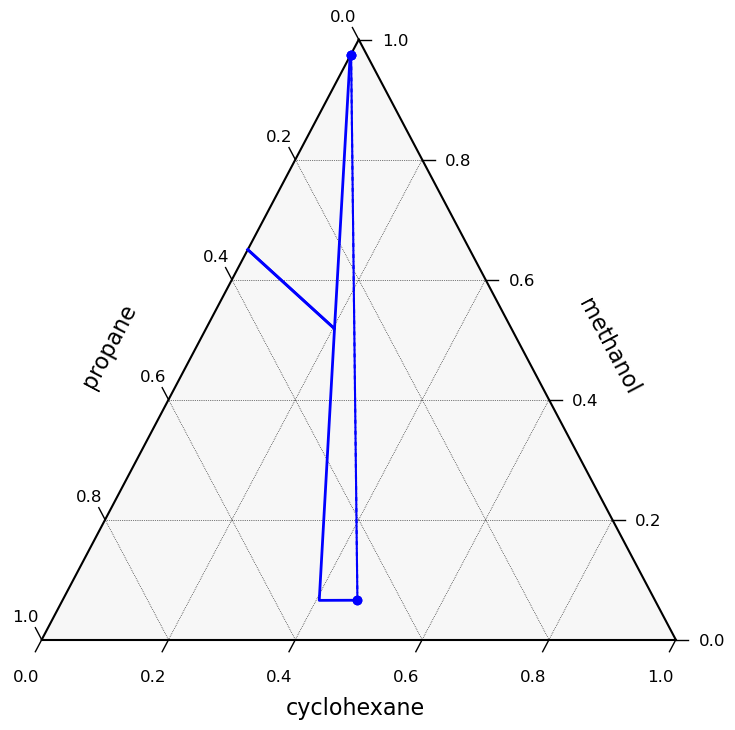

In [17]:
plt.clf()
figure, tax = ternary.figure(scale=1.0)
figure.set_size_inches(9, 9)

tax.boundary()
tax.gridlines(multiple=0.2, color="black")
tax.left_axis_label("propane", fontsize=16, offset=0.15)
tax.right_axis_label("methanol", fontsize=16, offset=0.15)
tax.bottom_axis_label("cyclohexane", fontsize=16, offset=0.02)

# Plot the data
#tax.plot(x_LLE[:,1:3], linewidth=2.0,color="b",linestyle="-", label="")
#tax.plot(x_LLE[:,4:6], linewidth=2.0,color="b",linestyle="-", label="")


tax.plot(x_VLE1[:,1:3], linewidth=2.0,color="b",linestyle="-", label="")
tax.plot(x_VLE1[:,4:6], linewidth=2.0,color="b",linestyle="-", label="")

#tax.plot(x_VLE2[:,1:3], linewidth=2.0,color="b",linestyle="-", label="")
#tax.plot(x_VLE2[:,4:6], linewidth=2.0,color="b",linestyle="-", label="")

tax.plot(x3,color="b",linestyle="--",marker="o", label="")
tax.plot(x3[[3,1],:],color="b",linestyle="--",marker="o", label="")


tax.ticks(axis="lbr", multiple=0.2, linewidth=1,fontsize=12, tick_formats="%.1f", offset=0.02)

ax = plt.gca()

#ax.text(0.55, 0.32, "VLLE",fontsize=16)
#ax.text(0.3, 0.45, "VLE",fontsize=16)
#ax.text(0.55, 0.05, "VLE",fontsize=16)

#ax.text(0.8, 0.65, "LLE",fontsize=16)
#ax.arrow(0.79, 0.64, -0.09, -0.09, head_width=0.01, head_length=0.02, fc="k", ec="k")


#ax.text(0.1, 0.07, "V",fontsize=16)
#ax.text(0.65, 0.8, "L",fontsize=16)
#ax.arrow(0.64, 0.79, -0.05, -0.05, head_width=0.01, head_length=0.02, fc="k", ec="k")
#ax.text(1.02, 0.07, "L",fontsize=16)
#ax.arrow(1.01, 0.065, -0.03, -0.005, head_width=0.01, head_length=0.02, fc="k", ec="k")

tax.get_axes().axis("off")
tax.clear_matplotlib_ticks()
tax.legend(loc="upper right",frameon=false,fontsize=14)
# tax.savefig("MeOH_Benz_Hx_tern.pdf")
#display(plt.gcf())

## MCA test

In [3]:
model_mix = SAFTgammaMie([("MCA",["cCH2"=>5, "cCHNH"=>1, "CH3"=>1]),("Water",["H2O"=>1]),("Carbon Dioxide",["CO2"=>1])];
        userlocations = (Mw = [14.02658, 28.0333, 15.035, 18.01528, 44.01],
        epsilon = [477.36 486.88 355.95 350.99 269.68
                   486.88 691.56 406.97 855.01 100.52
                   355.95 406.97 256.77 358.18 205.7
                   350.99 855.01 358.18 266.68 226.38
                   269.68 100.52 205.7 226.38 207.89],
        sigma = [4.7852, 5.5, 4.0773, 3.0063, 3.05],
        lambda_a = [6, 6, 6, 6, 5.055],
        lambda_r = [20.3860 13.4136 17.4742 28.0000 23.1735
                    13.4136 09.2374 11.6695 31.1320 31.2330
                    17.4742 11.6695 15.0500 100.000 19.7948
                    28.0000 32.1320 100.000 17.0200 21.1157
                    23.1735 31.2330 19.7948 21.1157 26.4080],
        vst = [1, 1, 1, 1, 2],
        S = [0.24751, 0.15346, 0.57255, 1, 0.84680],
        n_H=[0, 1, 0, 2, 0],
        n_e=[0, 1, 0, 2, 0],
        n_a1=[0, 0, 0, 0, 1],
        n_a2=[0, 0, 0, 0, 1],
        epsilon_assoc = Dict([(("cCHNH","H"),("cCHNH","e")) => 1293.5,
                              (("cCHNH","H"),("H2O","e")) => 5477.7,
                              (("cCHNH","e"),("CO2","a1")) => 2246.006,
                              (("cCHNH","e"),("CO2","a2")) => 3870.8,
                              (("H2O","H"),("cCHNH","e")) => 5903.8,
                              (("H2O","H"),("H2O","e")) => 1985.4,
                              (("H2O","e"),("CO2","a1")) => 1398.1]),
        bondvol = Dict([(("cCHNH","H"),("cCHNH","e")) => 438.49e-30,
                              (("cCHNH","H"),("H2O","e")) => 0.0095820e-30,
                              (("cCHNH","e"),("CO2","a1")) => 0.14056e-30,
                              (("cCHNH","e"),("CO2","a2")) => 6445.7e-30,
                              (("H2O","H"),("cCHNH","e")) => 0.002075e-30,
                              (("H2O","H"),("H2O","e")) => 101.69e-30,
                              (("H2O","e"),("CO2","a1")) => 91.419e-30])));


In [5]:
T = 333.15
p = 1.01e5
(x3,n3,G3) = tp_flash(model_mix,p,T,[0.33,0.33,0.34],DETPFlash(numphases=3));

### MCA H2O LLE (species 1 & 2)

In [65]:
K0 = [x3[1,1]/x3[2,1],x3[1,2]/x3[2,2],x3[1,3]/x3[2,3]]
z0 = (x3[1,:]+x3[2,:])/2
dz = z0[3]/200
x_LLE = zeros(200,6)

for i in 1:200
    println(z0)
    z0[3] = z0[3] - dz
    (x,n,G) = tp_flash(model_mix,p,T,z0,MichelsenTPFlash(K0=K0,equilibrium=:lle))
    x_LLE[i,1:3] = x[1,:] # x_LLE is a 200 x 6 matrix
    x_LLE[i,4:6] = x[2,:]
    K0 = [x[1,1]/x[2,1],x[1,2]/x[2,2],x[1,3]/x[2,3]]
    z0[1:2] = (x[1,1:2]+x[2,1:2])/2   
end

[0.18862143922579325, 0.6261616457012578, 0.18521691507294896]
[0.19360435743313037, 0.5243937528446213, 0.1842908304975842]
[0.40112147416354943, 0.45966796374581387, 0.18336474592221946]
[0.44764093406943284, 0.3991409251125207, 0.1824386613468547]
[0.4721860030416303, 0.36410127361889305, 0.18151257677148996]
[0.47970248836121787, 0.34822466767171284, 0.18058649219612521]
[0.48165590130004876, 0.34207716457911636, 0.17966040762076046]
[0.4821542599110188, 0.34017295840426565, 0.17873432304539572]
[0.48223481850491784, 0.3400348798965066, 0.17780823847003097]
[0.4821754960227762, 0.3406196446980514, 0.17688215389466622]
[0.4820638503294421, 0.341498072831246, 0.17595606931930147]
[0.48193126909819034, 0.34249545583429974, 0.17502998474393672]
[0.48178981743018723, 0.3435411219322683, 0.17410390016857197]
[0.48164427426987183, 0.3446066210144798, 0.17317781559320722]
[0.4814965514075944, 0.3456805493117846, 0.17225173101784247]
[0.48134741352278615, 0.3467583555421833, 0.1713256464424

### H2O CO2 VLE (species 2 & 3)

In [29]:
N = 1000
K0 = [x3[1,1]/x3[3,1],x3[1,2]/x3[3,2],x3[1,3]/x3[3,3]]
z0 = (x3[1,:]+x3[3,:])/2
z0 = [0.0481893, 0.178295, 0.773516]
dz = z0[1]/N # change species 1
x_VLE1 = zeros(N,6)

for i in 1:N
    z0[1] = z0[1] - dz
    println(z0)
    (x,n,G) = tp_flash(model_mix,p,T,z0,RRTPFlash(K0=K0,equilibrium=:vle))
    idx_min = argmin(x[:,2])
    idx_max = argmax(x[:,2])
    x_VLE1[i,1:3] = x[idx_min,:]
    x_VLE1[i,4:6] = x[idx_max,:]
    K0 = x_VLE1[i,1:3]./x_VLE1[i,4:6]
    z0[2:3] = (x[1,2:3]+x[2,2:3])/2   
end

[0.048141110699999996, 0.178295, 0.773516]
[0.048092921399999995, 0.17830353883166217, 0.7735530449138338]
[0.048044732099999994, 0.17831254269756192, 0.7735921073347392]
[0.04799654279999999, 0.17832156895514714, 0.7736312668998548]
[0.04794835349999999, 0.17833059628978562, 0.7736704311376642]
[0.04790016419999999, 0.17833962367613507, 0.7737095955998167]
[0.04785197489999999, 0.17834865106492068, 0.7737487600725382]
[0.04780378559999999, 0.17835767845377687, 0.773787924545566]
[0.04775559629999999, 0.17836670584259015, 0.7738270890184076]
[0.047707406999999986, 0.17837573323135517, 0.7738662534910399]
[0.047659217699999985, 0.1783847606200716, 0.7739054179634614]
[0.047611028399999984, 0.17839378800873948, 0.7739445824356721]
[0.04756283909999998, 0.1784028153973588, 0.7739837469076722]
[0.04751464979999998, 0.17841184278592961, 0.7740229113794619]
[0.04746646049999998, 0.17842087017445185, 0.7740620758510408]
[0.04741827119999998, 0.17842989756292557, 0.7741012403224092]
[0.0473700

### MCA CO2 VLE (species 1 & 3)

In [30]:
K0 = [x3[2,1]/x3[3,1],x3[2,2]/x3[3,2],x3[2,3]/x3[3,3]]
z0 = (x3[2,:]+x3[3,:])/2
dz = z0[2]/100 # alter species 2 
x_VLE2 = zeros(100,6)

for i in 1:100
    z0[2] = z0[2] - dz
    (x,n,G) = tp_flash(model_mix,p,T,z0,RRTPFlash(K0=K0,equilibrium=:vle))
    idx_min = argmin(x[:,2])
    idx_max = argmax(x[:,2])
    x_VLE2[i,1:3] = x[idx_min,:]
    x_VLE2[i,4:6] = x[idx_max,:]
    K0 = [x[1,1]/x[2,1],x[1,2]/x[2,2],x[1,3]/x[2,3]]
    z0[[1,3]] = (x[1,[1,3]]+x[2,[1,3]])/2
    println(z0)
end

[0.2099387749909118, 0.22016193891249572, 0.569315185052085]
[0.21096627234395132, 0.21793808094368264, 0.570365444392886]
[0.21205124426049224, 0.21571422297486956, 0.5714744515221821]
[0.21315129420817197, 0.21349036500605648, 0.5725988707038772]
[0.2142552309677257, 0.2112665070372434, 0.57372726280138]
[0.21536013168977913, 0.20904264906843031, 0.5748566402158927]
[0.2164652416702983, 0.20681879109961723, 0.5759862315245411]
[0.2175703685745365, 0.20459493313080415, 0.5771158401318169]
[0.21867546431725118, 0.20237107516199107, 0.5782454168872533]
[0.2197805173930235, 0.200147217193178, 0.5793749500305528]
[0.22088552546045642, 0.1979233592243649, 0.5805044371684506]
[0.22199048844035418, 0.19569950125555183, 0.5816338782199959]
[0.22309540679821943, 0.19347564328673875, 0.5827632736610038]
[0.2242002811219633, 0.19125178531792567, 0.5838926240924094]
[0.22530511201946285, 0.18902792734911258, 0.5850219301355559]
[0.2264099000941767, 0.1868040693802995, 0.5861511924072703]
[0.22751

In [28]:
x3[[3,1],:]

2×3 Matrix{Float64}:
 0.0481893  0.178295  0.773516
 0.0071764  0.985846  0.00697735

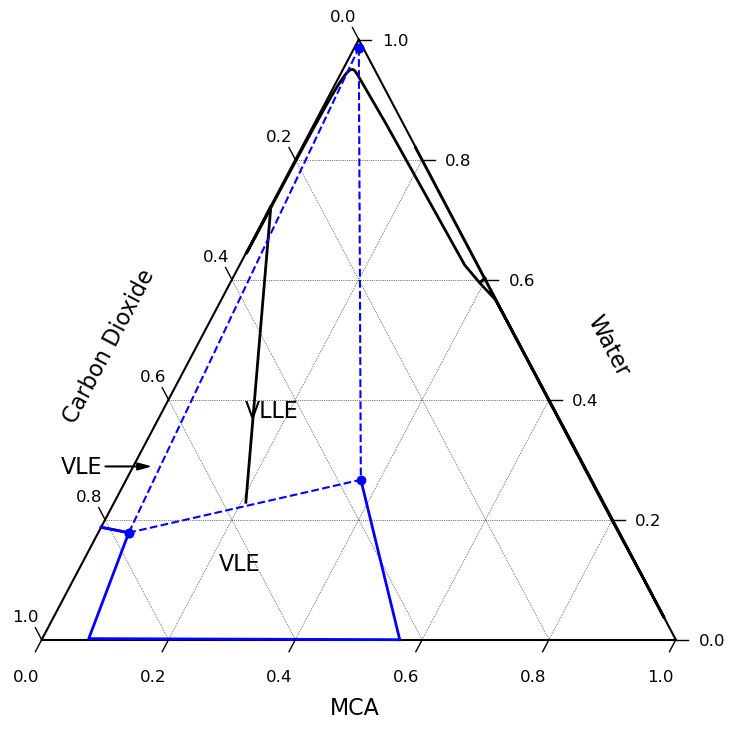

In [66]:
plt.clf()
figure, tax = ternary.figure(scale=1.0)
figure.set_size_inches(9, 9)

tax.boundary()
tax.set_background_color("white")
tax.gridlines(multiple=0.2, color="black")
tax.left_axis_label("Carbon Dioxide", fontsize=16, offset=0.15)
tax.right_axis_label("Water", fontsize=16, offset=0.15)
tax.bottom_axis_label("MCA", fontsize=16, offset=0.02)

# Plot the data
tax.plot(x_LLE[:,1:3], linewidth=2.0,color="k",linestyle="-", label="")
tax.plot(x_LLE[:,4:6], linewidth=2.0,color="k",linestyle="-", label="")

tax.plot(x_VLE1[:,1:3], linewidth=2.0,color="b",linestyle="-", label="")
tax.plot(x_VLE1[:,4:6], linewidth=2.0,color="b",linestyle="-", label="")

tax.plot(x_VLE2[:,1:3], linewidth=2.0,color="b",linestyle="-", label="")
tax.plot(x_VLE2[:,4:6], linewidth=2.0,color="b",linestyle="-", label="")

tax.plot(x3,color="b",linestyle="--",marker="o", label="")
tax.plot(x3[[3,1],:],color="b",linestyle="--",marker="o", label="")

tax.ticks(axis="lbr", multiple=0.2, linewidth=1,fontsize=12, tick_formats="%.1f", offset=0.02)

ax = plt.gca()

ax.text(0.32, 0.32, "VLLE",fontsize=16)
ax.text(0.28, 0.10, "VLE",fontsize=16)
#ax.text(0.55, 0.05, "VLE",fontsize=16)

#ax.text(0.8, 0.65, "LLE",fontsize=16)
#ax.arrow(0.79, 0.64, -0.09, -0.09, head_width=0.01, head_length=0.02, fc="k", ec="k")

#ax.text(0.1, 0.07, "V",fontsize=16)
#ax.text(0.65, 0.8, "L",fontsize=16)
ax.arrow(0.10, 0.25, 0.05, 0.00, head_width=0.01, head_length=0.02, fc="k", ec="k")
ax.text(0.03, 0.24, "VLE",fontsize=16)
#ax.text(1.02, 0.07, "L",fontsize=16)
#ax.arrow(1.01, 0.065, -0.03, -0.005, head_width=0.01, head_length=0.02, fc="k", ec="k")

tax.get_axes().axis("off")
tax.clear_matplotlib_ticks()
tax.legend(loc="upper right",frameon=false,fontsize=14)
# tax.savefig("MeOH_Benz_Hx_tern.pdf")
#display(plt.gcf())